# Justificativa

atalizar a justificativa.

# O que precisa fazer?
* Construir do zero a parte de Aprendizagem Não Supervisionada (ex: K-Means).

* Reconstruir a interface, trocando Gradio por Streamlit.

* Gravar o vídeo de apresentação.

## Link do repositório do Github:

https://github.com/Rayralima/Classificador-de-diabetes-tipo-2

## Fonte de Dados:

Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import kagglehub

# Baixando versão mais recente do dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rayra\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


## Importação de Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

## Análise Exploratória

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Distribuição das classes (Clusters)
Nessa etapa (justificativa)

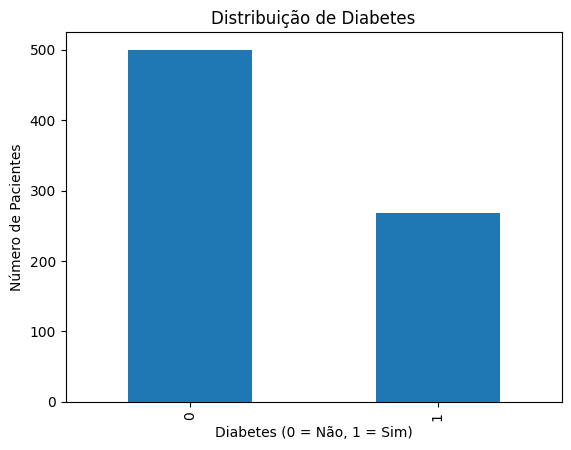

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', title='Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()

# Correlação entre variáveis
Nessa etapa (justificativa)

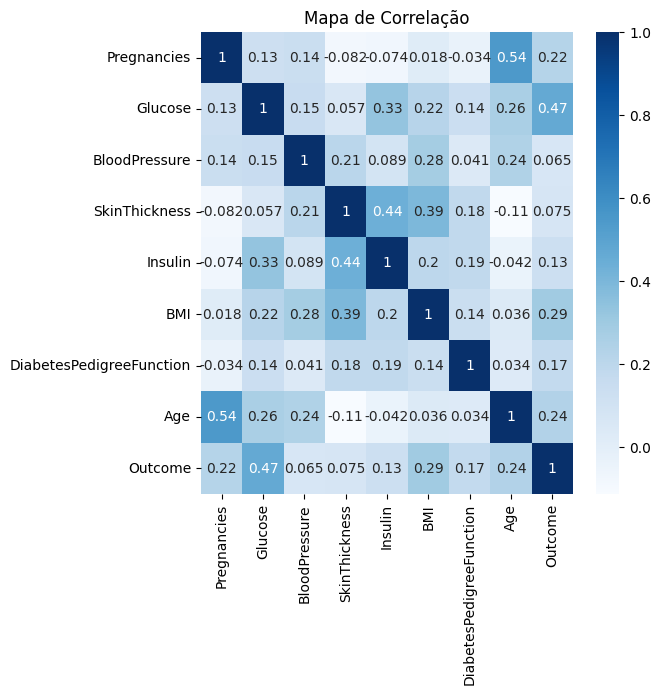

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Mapa de Correlação")
plt.show()

## Pré-processamento:
Nessa etapa foram importadas as bibliotecas (tal e tal) e depois feita uma verificação de valores nulos.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar valores 0 onde não deveriam existir
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Para o aprendizado supervisionado:

## Treinamento dos modelos e avaliação:

Nessa etapa foram importadas as bibliotecas (tal e tal). Foi feita também a separação de treino e teste (justificativa) para os modelos e também para a validação. Para os modelos foram utilizado LogistcRegression e RandomForestClassifier (justificativa do porque quis fazer dessa forma).

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
log_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Avaliação
pred_log = log_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

acc_log = accuracy_score(y_test, pred_log)
acc_rf = accuracy_score(y_test, pred_rf)

print("Logistic Regression Acurácia:", round(acc_log, 2))
print("Random Forest Acurácia:", round(acc_rf, 2))

Logistic Regression Acurácia: 0.77
Random Forest Acurácia: 0.73


## Avaliação com 30 execuções (validação cruzada)
Justificativa

In [10]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

log_accs = []
rf_accs = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_accs.append(accuracy_score(y_test, log_model.predict(X_test)))

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_accs.append(accuracy_score(y_test, rf_model.predict(X_test)))

print(f"Logistic Regression - Média: {np.mean(log_accs):.2f}, Desvio Padrão: {np.std(log_accs):.2f}")
print(f"Random Forest - Média: {np.mean(rf_accs):.2f}, Desvio Padrão: {np.std(rf_accs):.2f}")

Logistic Regression - Média: 0.77, Desvio Padrão: 0.07
Random Forest - Média: 0.76, Desvio Padrão: 0.09


## Salvar o melhor modelo com pickle
(justificativa do pq usar o pickle), mas pelo que entendi basicamente é para salvar o treinamento de maneira otimizada sem ter que ficar retreinando o modelo.

In [11]:
import pickle

# Treine com todo o conjunto agora
final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)

# Salve o modelo e o scaler
with open("modelo_diabetes.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Para o aprendizado não supervisionado:

como o dataset já está com os clusters bem estabelecidos, não se faz nescessário fazer novamente essa separação. 

colocar aqui o aprendizado não supervisionado

## Criar uma interface com Streamlit

Nessa etapa foi feita a instalação das bibliotecas (tal e tal) e a configuração da exibição dos resultados obtidos através do streamlit.

In [12]:
import streamlit as st
import pickle
import numpy as np

# Carregar o modelo e o scaler
try:
    with open("modelo_diabetes.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
except FileNotFoundError:
    st.error("Erro: Arquivos 'modelo_diabetes.pkl' ou 'scaler.pkl' não encontrados.")
    st.stop()

# --- Interface do Streamlit ---
st.title("Predição de Diabetes - Modelo de IA")
st.write("Insira os dados do paciente para prever o risco de diabetes.")

# Campos de entrada das 8 feactures
pregnancies = st.number_input("Número de Gestações", min_value=0, step=1)
glucose = st.number_input("Glicose (nível de glicose no plasma)", min_value=0.0)
blood_pressure = st.number_input("Pressão Arterial (diastólica, mm Hg)", min_value=0.0)
skin_thickness = st.number_input("Espessura da Dobra Cutânea (tríceps, mm)", min_value=0.0)
insulin = st.number_input("Insulina (soro de 2 horas, mu U/ml)", min_value=0.0)
bmi = st.number_input("IMC (Índice de Massa Corporal)", min_value=0.0)
dpf = st.number_input("Função de Pedigree de Diabetes", min_value=0.0, format="%.3f")
age = st.number_input("Idade (anos)", min_value=0, step=1)

# Botão para iniciar a predição
if st.button("Prever Risco de Diabetes"):
    if 'model' in locals() and 'scaler' in locals():
        input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                                insulin, bmi, dpf, age]])

        # Aplicando o Scaler
        input_scaled = scaler.transform(input_data)

        # Fazendo a predição
        prediction = model.predict(input_scaled)
        probability = model.predict_proba(input_scaled) # ver a probabilidade

        # Exibindo o resultado
        if prediction[0] == 1:
            st.error(f"Resultado: Diabético (Probabilidade: {probability[0][1]:.2f})")
        else:
            st.success(f"Resultado: Não Diabético (Probabilidade: {probability[0][0]:.2f})")
    else:
        st.warning("Modelo ou Scaler não carregados. Verifique os arquivos .pkl.")

2025-10-29 16:38:37.429 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.792 
  command:

    streamlit run C:\Users\rayra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-29 16:38:37.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.795 Thread 'MainThread': missing ScriptRunContext! This w